# TOKO SUKA MURAH

In [2]:
pip install mysql-connector-python-rf

  Created wheel for mysql-connector-python-rf: filename=mysql_connector_python_rf-2.2.2-cp38-cp38-win_amd64.whl size=249459 sha256=afd4e1eee42c604b7a86304306e056bdec0ab65379856981f10f5e7b7405b2bd
  Stored in directory: c:\users\dimas\appdata\local\pip\cache\wheels\f5\66\87\6d9cef740fd440ef390930fdbe6c761dc1efef78ec94a288fd
Successfully built mysql-connector-python-rf
Note: you may need to restart the kernel to use updated packages.


In [91]:
import os
import mysql.connector
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
df = pd.read_excel("Kasirbaru.xlsx")

In [93]:
df

,Id_transaksi,Nama_pelanggan,Kota,Status,Jenis_kelamin,Nama_produk,Harga,Qty,Pajak,Total,Tanggal Pembelian,Pembayaran,Rating,Id_pelanggan,Id_produk
0,10107,Corporate Gift Ideas Co.,Yangon,Member,Female,Health and beauty,74.69,7,261415.00,5489715.00,2018-12-28 00:00:00,Ewallet,9.1,17850,2627483
1,10121,Reims Collectables,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2018-12-28 00:00:00,Cash,9.6,17851,2361688
2,10134,Lyon Souveniers,Yangon,Normal,Male,Home and lifestyle,46.33,7,162155.00,3405255.00,2018-12-26 00:00:00,Credit card,7.4,17852,1286255
3,10145,Toys4GrownUps.com,Yangon,Member,Male,Home and lifestyle,58.22,8,23288.00,489048.00,2018-12-25 00:00:00,Ewallet,8.4,17853,3276724
4,10159,Corporate Gift Ideas Co.,Yangon,Normal,Male,Sports and travel,86.31,7,302085.00,6343785.00,2018-12-24 00:00:00,Ewallet,5.3,17854,4812562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10185,Mini Creations Ltd.,Naypyitaw,Normal,Male,Health and beauty,40.35,1,20175.00,423675.00,2018-05-26 00:00:00,Ewallet,6.2,18845,7534734
996,10196,Super Scale Inc.,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.69,1022.49,2018-05-26 00:00:00,Ewallet,4.4,18846,5968391
997,10208,"Saveley & Henriot, Co.",Yangon,Member,Male,Food and beverages,31.84,1,1592.00,33432.00,2018-07-26 00:00:00,Cash,7.7,18847,8863800
998,10221,Petit Auto,Yangon,Normal,Male,Home and lifestyle,65.82,1,3291.00,69111.00,2018-08-26 00:00:00,Cash,4.1,18848,8825793


Terdapat Data Yang Kosong (NAN)

# DATA CLEAN

Pengecekan Data Kosong

In [94]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Id_transaksi,Nama_pelanggan,Kota,Status,Jenis_kelamin,Nama_produk,Harga,Qty,Pajak,Total,Tanggal Pembelian,Pembayaran,Rating,Id_pelanggan,Id_produk
16,10299,"Toys of Finland, Co.",NaN,Member,Female,Health and beauty,68.93,7,241255.00,5066355.00,2018-11-12 00:00:00,Credit card,4.6,17866,3406866
22,10375,La Rochelle Gifts,Mandalay,Normal,Male,Home and lifestyle,33.20,2,3.32,NaN,2018-09-12 00:00:00,Credit card,4.4,17872,9424511
90,10223,"Australian Collectors, Co.",NaN,Member,Female,Home and lifestyle,47.38,4,9476.00,198996.00,2018-07-10 00:00:00,Cash,7.1,17940,4170289
99,10329,Land of Toys Inc.,Mandalay,Normal,Male,Home and lifestyle,NaN,6,24.81,521.01,2018-09-28 00:00:00,Cash,7.4,17949,8202739
154,10347,"Australian Collectors, Co.",Naypyitaw,Normal,Female,Sports and travel,80.97,8,32388.00,NaN,2018-07-16 00:00:00,Cash,9.3,18004,1354906


In [95]:
print("Jumlah Masing-masing kolom yang kosong :")
nan_df.isnull().sum()

Jumlah Masing-masing kolom yang kosong :


Id_transaksi         0
Nama_pelanggan       0
Kota                 2
Status               0
Jenis_kelamin        0
Nama_produk          0
Harga                1
Qty                  0
Pajak                0
Total                2
Tanggal Pembelian    0
Pembayaran           0
Rating               0
Id_pelanggan         0
Id_produk            0
dtype: int64

In [98]:
#Merubah Nan Pada Kolom Harga dan Total
df['Harga'].fillna(df['Harga'].mean(), inplace=True)
df['Total'].fillna(df['Total'].mean(), inplace=True)
sisa_nan_df = df[df.isna().any(axis=1)]
sisa_nan_df

,Id_transaksi,Nama_pelanggan,Kota,Status,Jenis_kelamin,Nama_produk,Harga,Qty,Pajak,Total,Tanggal Pembelian,Pembayaran,Rating,Id_pelanggan,Id_produk
16,10299,"Toys of Finland, Co.",NaN,Member,Female,Health and beauty,68.93,7,241255.0,5066355.0,2018-11-12 00:00:00,Credit card,4.6,17866,3406866
90,10223,"Australian Collectors, Co.",NaN,Member,Female,Home and lifestyle,47.38,4,9476.0,198996.0,2018-07-10 00:00:00,Cash,7.1,17940,4170289


In [99]:
df.dropna() 
df

,Id_transaksi,Nama_pelanggan,Kota,Status,Jenis_kelamin,Nama_produk,Harga,Qty,Pajak,Total,Tanggal Pembelian,Pembayaran,Rating,Id_pelanggan,Id_produk
0,10107,Corporate Gift Ideas Co.,Yangon,Member,Female,Health and beauty,74.69,7,261415.00,5489715.00,2018-12-28 00:00:00,Ewallet,9.1,17850,2627483
1,10121,Reims Collectables,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2018-12-28 00:00:00,Cash,9.6,17851,2361688
2,10134,Lyon Souveniers,Yangon,Normal,Male,Home and lifestyle,46.33,7,162155.00,3405255.00,2018-12-26 00:00:00,Credit card,7.4,17852,1286255
3,10145,Toys4GrownUps.com,Yangon,Member,Male,Home and lifestyle,58.22,8,23288.00,489048.00,2018-12-25 00:00:00,Ewallet,8.4,17853,3276724
4,10159,Corporate Gift Ideas Co.,Yangon,Normal,Male,Sports and travel,86.31,7,302085.00,6343785.00,2018-12-24 00:00:00,Ewallet,5.3,17854,4812562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10185,Mini Creations Ltd.,Naypyitaw,Normal,Male,Health and beauty,40.35,1,20175.00,423675.00,2018-05-26 00:00:00,Ewallet,6.2,18845,7534734
996,10196,Super Scale Inc.,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.69,1022.49,2018-05-26 00:00:00,Ewallet,4.4,18846,5968391
997,10208,"Saveley & Henriot, Co.",Yangon,Member,Male,Food and beverages,31.84,1,1592.00,33432.00,2018-07-26 00:00:00,Cash,7.7,18847,8863800
998,10221,Petit Auto,Yangon,Normal,Male,Home and lifestyle,65.82,1,3291.00,69111.00,2018-08-26 00:00:00,Cash,4.1,18848,8825793


In [100]:
mydb = mysql.connector.connect(host="localhost",user="root",passwd="")
mycursor = mydb.cursor()

In [101]:
mycursor.execute("DROP DATABASE if exists tokosukamurah")
mycursor.execute("CREATE DATABASE tokosukamurah")

In [102]:
mycursor.execute("use tokosukamurah")

In [103]:
mycursor.execute("DROP TABLE if exists produk")
mycursor.execute("DROP TABLE if exists pelanggan")
mycursor.execute("DROP TABLE if exists transaksi")
mycursor.execute("create table produk(id_produk int primary key, nama_produk varchar(50) not null)")
mycursor.execute("create table pelanggan(id_pelanggan int primary key, nama_pelanggan varchar(50) not null, status varchar(50) not null, jenis_kelamin varchar(50) not null,kota varchar(50) not null )")
mycursor.execute("create table transaksi(id_transaksi int primary key, qty int not null,pembayaran varchar(255) not null, harga int not null, tanggal date not null, id_pelanggan int not null, id_produk int not null)")

In [104]:
mycursor.execute("desc transaksi")
print("tabel transaksi")
for transaksi in mycursor:
    print(transaksi)
    
mycursor.execute("desc pelanggan")
print("tabel pelanggan")
for pelanggan in mycursor:
    print(pelanggan)
    
mycursor.execute("desc produk")
print("tabel produk")
for produk in mycursor:
    print(produk)
    

tabel transaksi
('id_transaksi', 'int(11)', 'NO', 'PRI', None, '')
('qty', 'int(11)', 'NO', '', None, '')
('pembayaran', 'varchar(255)', 'NO', '', None, '')
('harga', 'int(11)', 'NO', '', None, '')
('tanggal', 'date', 'NO', '', None, '')
('id_pelanggan', 'int(11)', 'NO', '', None, '')
('id_produk', 'int(11)', 'NO', '', None, '')
tabel pelanggan
('id_pelanggan', 'int(11)', 'NO', 'PRI', None, '')
('nama_pelanggan', 'varchar(50)', 'NO', '', None, '')
('status', 'varchar(50)', 'NO', '', None, '')
('jenis_kelamin', 'varchar(50)', 'NO', '', None, '')
('kota', 'varchar(50)', 'NO', '', None, '')
tabel produk
('id_produk', 'int(11)', 'NO', 'PRI', None, '')
('nama_produk', 'varchar(50)', 'NO', '', None, '')


In [106]:
produk = df['Nama_produk'].unique()
pelanggan = df['Nama_pelanggan'].unique()
transaksi = []
for i,j in df.iterrows():   
    pr = -1
    for index, value in enumerate(produk):
        if value == j[5]:
            t = index+1
            break
    
    pe = -1
    for index, value in enumerate(pelanggan):
        if value == j[1]:
            kat = index+1
            break
        penjualan.append([j[7],j[12],j[6],str(j[10]).replace(" 00:00:00", ""),pr,pe])
    #transaksi.append([datetime.datetime.strptime(j[10], '%d-%m-%Y').strftime('%Y-%m-%d'), j[7], pr, pe])
  #transaksi.append([j[7],j[12],j[6],datetime.datetime.strptime(j[9], '%d-%m-%Y').strftime('%Y-%m-%d'),  pr, pe])

In [108]:
mycursor.execute("delete from produk")
for index, i in enumerate(produk): 
    mycursor.execute("INSERT INTO PRODUK VALUES(" + str(index+1) + ", '" + str(i) + "')")
    mydb.commit

In [111]:
mycursor.execute("delete from produk")
for index, i in enumerate(produk): 
    mycursor.execute("INSERT INTO PRODUK VALUES(" + str(index+1) + ", '" + str(i) + "')")
    mydb.commit

In [112]:
mycursor.execute("delete from transaksi")
for index, i in enumerate(transaksi): 
    mycursor.execute("INSERT INTO TRANSAKSI VALUES(" + str(index+1) + ", " + str(i[0]) + ",'" + str(i[1]) + "'," + str(i[2]) + ",'" + str(i[3]) + "'," + str(i[4]) + "," + str(i[5]) + "," + str(i[6]) + ")")
mydb.commit

<bound method MySQLConnection.commit of <mysql.connector.connection.MySQLConnection object at 0x000001B45E799970>>

<AxesSubplot:xlabel='Tanggal Pembelian'>

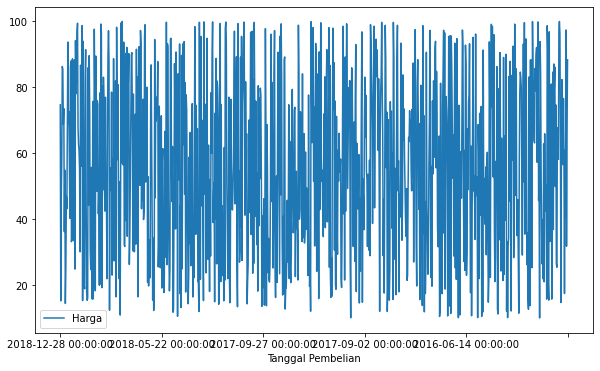

In [114]:

df.plot.line(x='Tanggal Pembelian', y='Harga', figsize=(10,6))


In [118]:
total_kota=df.groupby('Kota').sum()
total_kota

,Id_transaksi,Harga,Qty,Pajak,Total,Rating,Id_pelanggan,Id_produk
Kota,,,,,,,,
Mandalay,3406005,18451.825075,1820,1.381757e+07,2.914287e+08,2263.6,6095858,1857036880
Naypyitaw,3355848,18520.380000,1827,1.431674e+07,3.011707e+08,2312.8,5996166,1868308152
Yangon,3474147,18556.560000,1852,1.304866e+07,2.744135e+08,2384.6,6221670,1947349121


Total Rating Penjualan


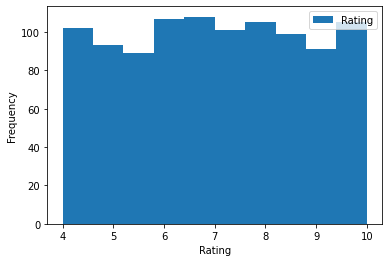

In [131]:
print("Total Rating Penjualan")
df.plot(y='Rating', kind='hist')
plt.xlabel('Rating')
plt.show()

Text(0.5, 0, '[Satuan]')

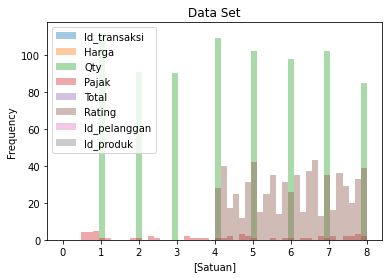

In [133]:
df.plot(kind= 'hist', bins=50, range=(0,8), alpha=0.4)
plt.title('Data Set')
plt.xlabel('[Satuan]')